# Students Scores Regression Model

### Description: This notebook explores student scores data and builds a regression model to predict student performance based on test scores. It covers data exploration, preprocessing, model selection, hyperparameter tuning, and evaluation. The best-performing model is identified and analyzed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('student_marks.csv')

# Take a Quieck look at Data Structure

In [3]:
data.head()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88


In [4]:
data.shape

(56, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student_ID  56 non-null     int64
 1   Test_1      56 non-null     int64
 2   Test_2      56 non-null     int64
 3   Test_3      56 non-null     int64
 4   Test_4      56 non-null     int64
 5   Test_5      56 non-null     int64
 6   Test_6      56 non-null     int64
 7   Test_7      56 non-null     int64
 8   Test_8      56 non-null     int64
 9   Test_9      56 non-null     int64
 10  Test_10     56 non-null     int64
 11  Test_11     56 non-null     int64
 12  Test_12     56 non-null     int64
dtypes: int64(13)
memory usage: 5.8 KB


In [6]:
data.describe()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,22027.500000,70.750000,69.196429,68.089286,67.446429,67.303571,66.000000,66.160714,65.303571,64.392857,64.250000,64.517857,65.928571
std,16.309506,17.009356,17.712266,18.838333,19.807179,20.746890,21.054043,21.427914,22.728372,23.211814,22.598673,22.610529,22.464402
min,22000.000000,40.000000,34.000000,35.000000,28.000000,26.000000,29.000000,26.000000,19.000000,9.000000,12.000000,19.000000,20.000000
25%,22013.750000,57.750000,55.750000,53.000000,54.500000,53.750000,50.250000,47.000000,45.750000,44.000000,45.750000,46.750000,46.750000
50%,22027.500000,70.500000,68.500000,70.000000,71.500000,69.000000,65.500000,64.000000,67.500000,65.500000,65.500000,64.000000,67.500000
75%,22041.250000,84.000000,83.250000,85.000000,84.000000,85.250000,83.750000,85.250000,83.250000,84.250000,83.250000,84.000000,86.500000
max,22055.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Exploratory Data Analysis

### Display the distribution of scores for each test

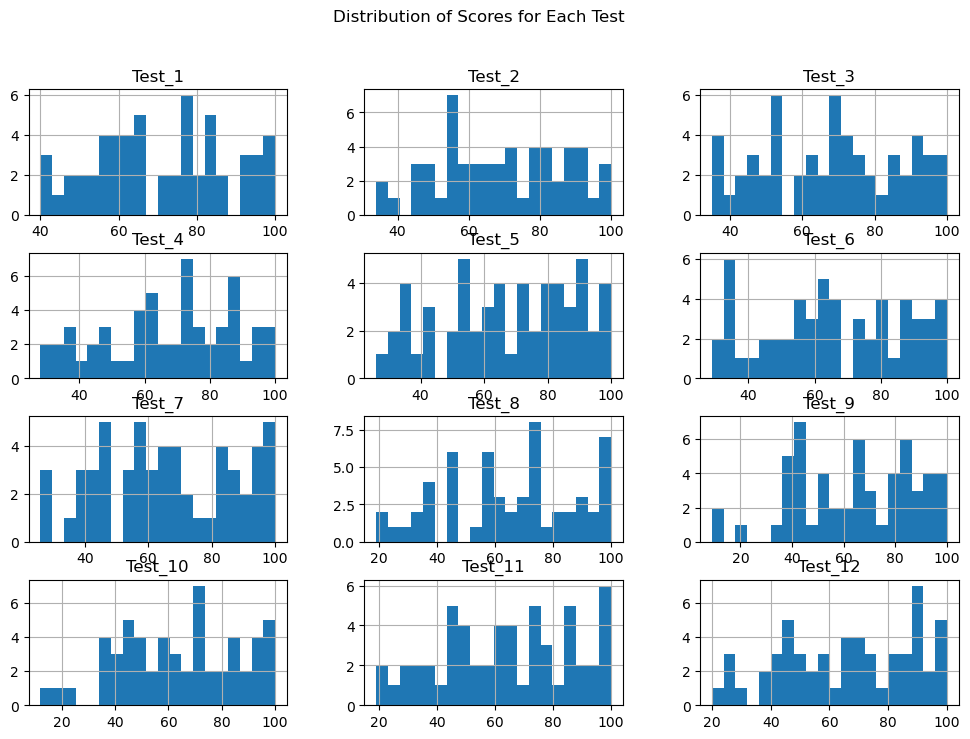

In [7]:
tests = ['Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Test_6', 'Test_7',
         'Test_8', 'Test_9', 'Test_10', 'Test_11', 'Test_12']
data[tests].hist(bins =20 ,figsize = (12, 8))
plt.suptitle('Distribution of Scores for Each Test')
plt.show();

### Observe the spread of scores and identify potential outliers for each test

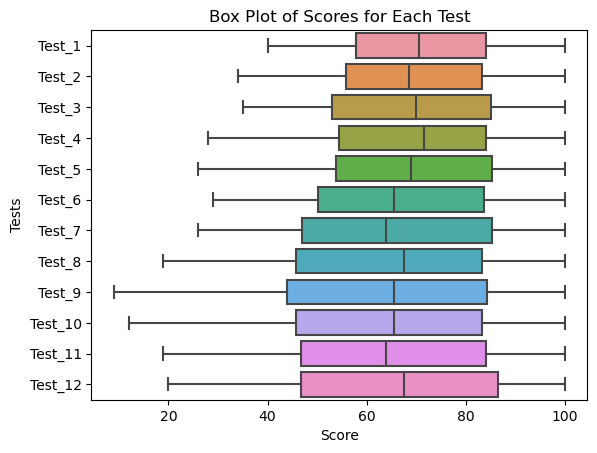

In [8]:
sns.boxplot(data = data[tests], orient='h')
plt.title('Box Plot of Scores for Each Test')
plt.xlabel('Score')
plt.ylabel('Tests')
plt.show()

### Explore the relationships between different tests using a pair plot

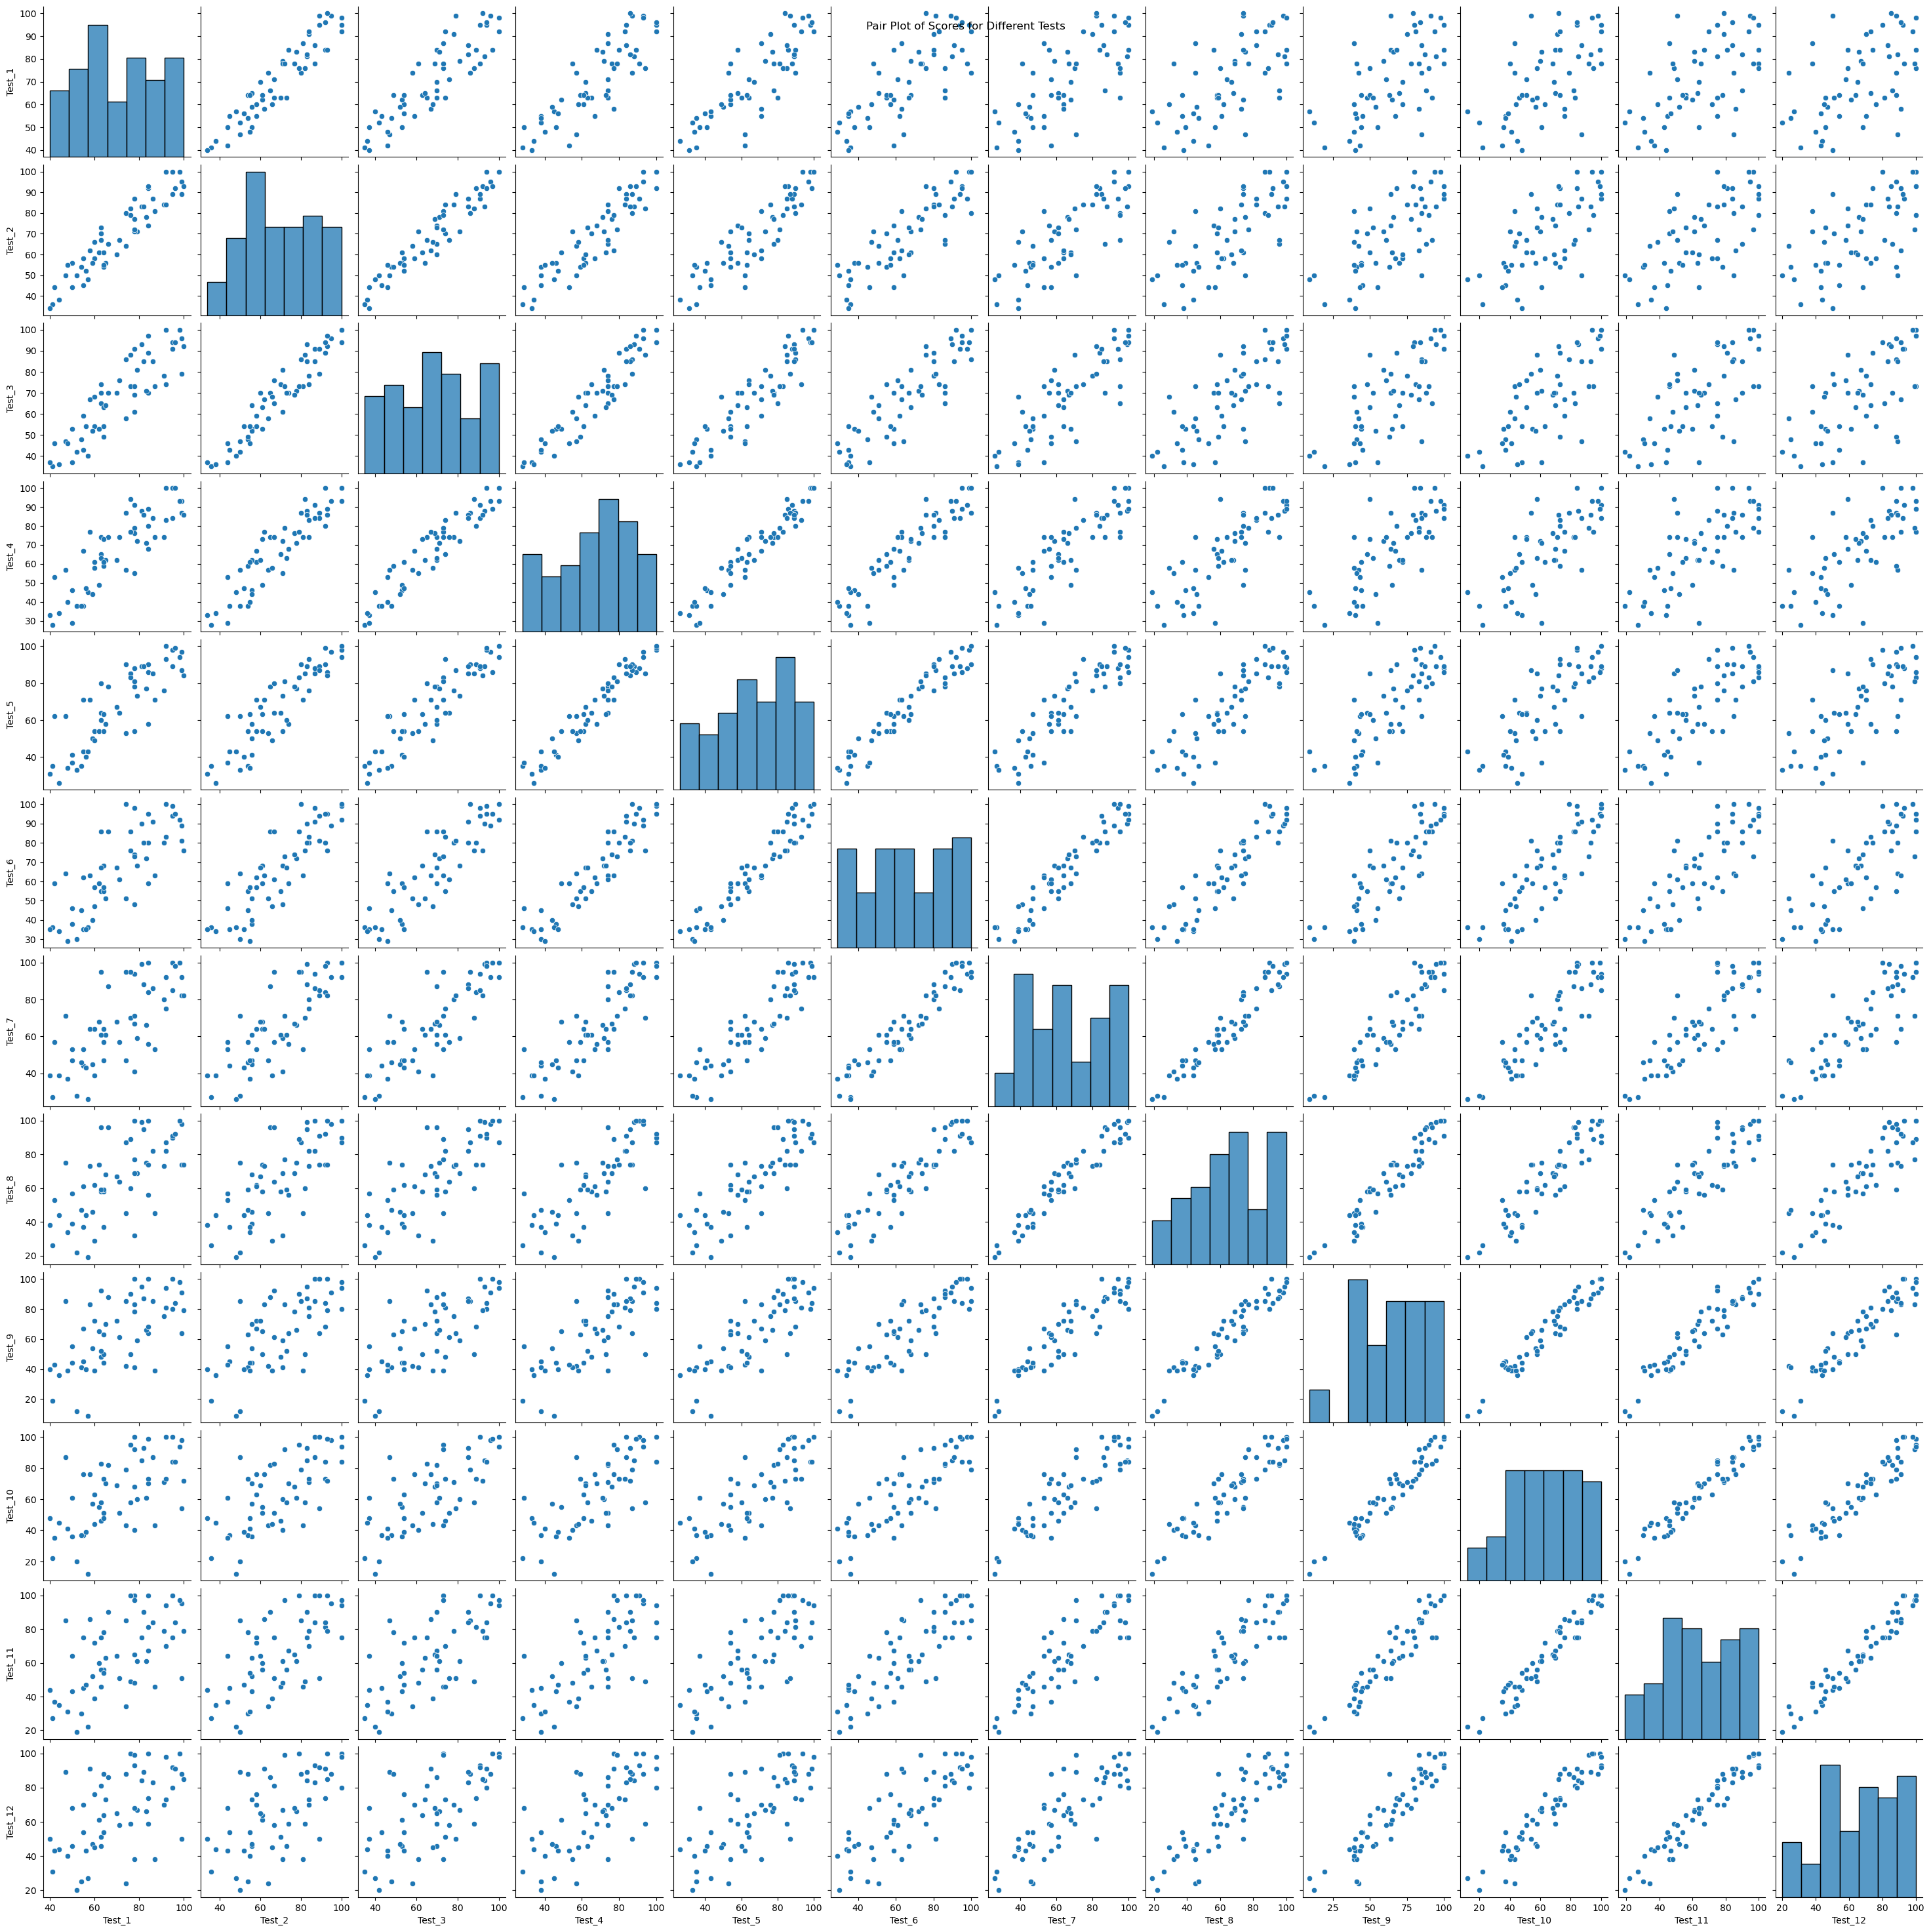

In [9]:
sns.pairplot(data[tests])
plt.suptitle('Pair Plot of Scores for Different Tests')
plt.show()

### Visualize the correlation between tests to understand if certain tests have a strong relationship with each other

In [10]:
correlation_matrix = data[tests].corr()

<Axes: >

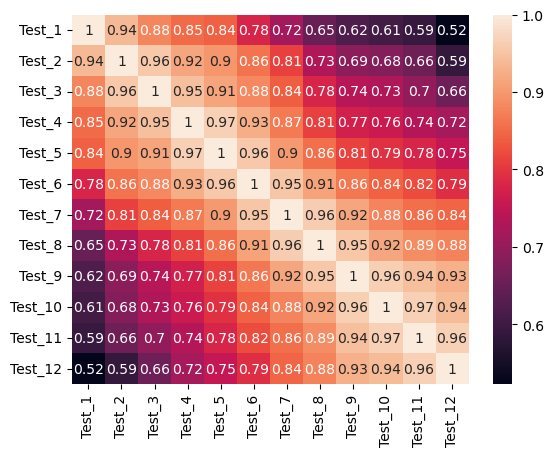

In [11]:
sns.heatmap(correlation_matrix, annot = True)

# Spliting Data

In [12]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Student_ID', 'Test_12'])
y = data['Test_12']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Data Preprocessing

In [14]:
# Check for Nulls
X_train.isnull().sum()

Test_1     0
Test_2     0
Test_3     0
Test_4     0
Test_5     0
Test_6     0
Test_7     0
Test_8     0
Test_9     0
Test_10    0
Test_11    0
dtype: int64

In [15]:
# Check for Duplicates
X_train.duplicated().sum()

0

# Build The Model

In [16]:
# Initialize regression models
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regression' : DecisionTreeRegressor(),
    'Random Forest Regression' : RandomForestRegressor(),
    'SVR' : SVR()
}

In [17]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")

Linear Regression - MSE: 26.344512023805283, R^2: 0.9473307269297908
Decision Tree Regression - MSE: 203.08333333333334, R^2: 0.5939855887375567
Random Forest Regression - MSE: 47.61315833333334, R^2: 0.9048093798159024
SVR - MSE: 294.43960576033163, R^2: 0.41134153540356044


# Fine Tune Hyperparameters

In [18]:
Lasso_Regression = Lasso()
Ridge_Regression = Ridge()

In [19]:
# Set up the parameter grid for each regularization technique
lasso_params = {'alpha': [0.1, 0.01, 0.001]}  # Alpha is the regularization strength for Lasso
ridge_params = {'alpha': [0.1, 0.01, 0.001]}  # Alpha is the regularization strength for Ridge

In [20]:
# Perform GridSearchCV for Lasso Regression
lasso_grid = GridSearchCV(Lasso_Regression, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 0.01, 0.001]})

In [21]:
ridge_grid = GridSearchCV(Ridge_Regression, ridge_params, cv = 5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 0.01, 0.001]})

In [22]:
# Get the best hyperparameters for Lasso and Ridge
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_ridge_alpha = ridge_grid.best_params_['alpha']

In [23]:
# Train the lasso model with the best hyperparameters
final_lasso_model = Lasso(alpha = best_lasso_alpha)
final_lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [24]:
# Train the ridge model with the best hyperparameters
final_ridge_model = Ridge(alpha = best_ridge_alpha)
final_ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

## Evaluate Performance of each Model

In [25]:
y_pred = final_lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{final_lasso_model} - MSE: {mse}, R^2: {r2}")

Lasso(alpha=0.1) - MSE: 25.387221805318706, R^2: 0.949244589668237


In [26]:
y_pred = final_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{final_ridge_model} - MSE: {mse}, R^2: {r2}")

Ridge(alpha=0.1) - MSE: 26.33680208503547, R^2: 0.947346141027044
